In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

## Explore Stock Data

In [2]:
#load csv into dataframe
df_stocks = pd.read_csv('TJstockdata.csv')

In [3]:
df_stocks.shape

(1729, 8)

In [4]:
df_stocks.dtypes

Stock        object
Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Adjusted    float64
dtype: object

In [5]:
df_stocks.head()

,Stock,Date,Open,High,Low,Close,Volume,Adjusted
0,AMZN,4/24/2020,2417.000000,2420.429932,2382.00000,2410.219971,3831800,2410.219971
1,AMZN,4/27/2020,2443.199951,2444.879883,2363.00000,2376.000000,5645600,2376.000000
2,AMZN,4/28/2020,2372.100098,2373.500000,2306.00000,2314.080078,5269400,2314.080078
3,AMZN,4/29/2020,2330.010010,2391.889893,2310.00000,2372.709961,4591600,2372.709961
4,AMZN,4/30/2020,2419.840088,2475.000000,2396.01001,2474.000000,9534600,2474.000000


In [6]:
 # convert object into date time
df_stocks ['Date'] = pd.to_datetime(df_stocks ['Date'] , errors='coerce')

In [7]:
# save only date from the date time
df_stocks['Date'] = df_stocks['Date'].dt.date

In [8]:
min(df_stocks['Date'])

datetime.date(2020, 4, 24)

In [9]:
max(df_stocks['Date'])

datetime.date(2021, 4, 16)

In [10]:
#create df only for GME stock
df_stock_GME = df_stocks[df_stocks.Stock == 'GME']

In [11]:
df_stock_GME.shape

(247, 8)

In [12]:
min(df_stock_GME['Date'])

datetime.date(2020, 4, 24)

In [13]:
max(df_stock_GME['Date'])

datetime.date(2021, 4, 16)

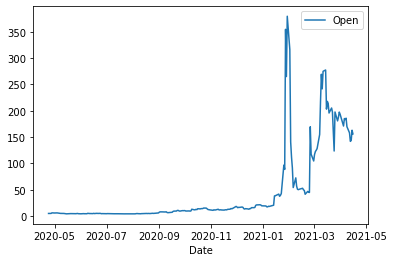

In [14]:
df_stock_GME.plot( x= 'Date', y = 'Open')
pyplot.show()

## Explore Sentiment Data

In [15]:
#load csv into dataframe
df_reddit = pd.read_csv('posts_with_scores_and_ticker.csv')

In [18]:
df_reddit = pd.read_csv('test.csv')

In [16]:
#convert True/False in stock columns to 1/0
df_reddit = df_reddit*1

In [17]:
df_reddit.shape

(111600, 13)

In [18]:
df_reddit.head(2)

,author,timestamp,id,score,text,scores,compound_score,sentiment,AMC,NAKD,BB,GME,KOSS
0,WTCwrnr,"2021-03-17, 10:11:46",m75ago,1,*Processing img uzcczofdfmn61...*\n\nCan we he...,"{'neg': 0.02, 'neu': 0.831, 'pos': 0.149, 'com...",0.9033,pos,0,0,0,0,0
1,aresvswrld,"2021-03-17, 10:11:24",m75a5u,1,"I currently use Robinhood, and I have been for...","{'neg': 0.048, 'neu': 0.891, 'pos': 0.061, 'co...",0.1531,pos,0,0,0,1,0


In [19]:
df_reddit.dtypes

author             object
timestamp          object
id                 object
score               int64
text               object
scores             object
compound_score    float64
sentiment          object
AMC                 int32
NAKD                int32
BB                  int32
GME                 int32
KOSS                int32
dtype: object

In [20]:
min(df_reddit['timestamp'])

'2020-08-14, 16:32:54'

In [21]:
max(df_reddit['timestamp'])

'2021-03-17, 10:11:46'

In [22]:
# convert timestamp into date time
df_reddit['timestamp'] = pd.to_datetime(df_reddit['timestamp'], errors='coerce')

In [31]:
# save only date from the date time
df_reddit['timestamp'] = df_reddit['timestamp'].dt.date

In [32]:
df_reddit.dtypes

author             object
timestamp          object
id                 object
score               int64
text               object
scores             object
compound_score    float64
sentiment          object
AMC                 int32
NAKD                int32
BB                  int32
GME                 int32
KOSS                int32
dtype: object

## Create Sentiment Timeseries for GME

In [33]:
#create df only for GME
df_reddit_GME = df_reddit[df_reddit.GME == 1]

In [34]:
df_reddit_GME.shape

(24213, 13)

In [35]:
df_reddit_GME.dtypes

author             object
timestamp          object
id                 object
score               int64
text               object
scores             object
compound_score    float64
sentiment          object
AMC                 int32
NAKD                int32
BB                  int32
GME                 int32
KOSS                int32
dtype: object

In [36]:
df_reddit_GME.head(3)

,author,timestamp,id,score,text,scores,compound_score,sentiment,AMC,NAKD,BB,GME,KOSS
1,aresvswrld,2021-03-17,m75a5u,1,"I currently use Robinhood, and I have been for...","{'neg': 0.048, 'neu': 0.891, 'pos': 0.061, 'co...",0.1531,pos,0,0,0,1,0
15,bosshax,2021-03-17,m74p9p,1,**Short Interest report from S3 Partners updat...,"{'neg': 0.08, 'neu': 0.815, 'pos': 0.104, 'com...",0.8865,pos,1,0,1,1,0
31,Far-Opportunity2942,2021-03-17,m74b9i,1,Do you all lack perspective? GME was $5-$10 fo...,"{'neg': 0.139, 'neu': 0.809, 'pos': 0.052, 'co...",-0.7621,neg,0,0,0,1,0


In [59]:
#create df aggregated by daily sentiment
df_daily_reddit_GME = df_reddit_GME.groupby("timestamp").agg({'id': lambda x: list(x), 'timestamp': lambda x:x.value_counts().index[0], 'compound_score': np.mean, 'sentiment': lambda x:x.value_counts().index[0]})

In [60]:
df_daily_reddit_GME.shape

(188, 4)

In [61]:
df_daily_reddit_GME.head(10)

,id,timestamp,compound_score,sentiment
timestamp,,,,
2020-08-19,[icvdos],2020-08-19,0.620100,pos
2020-08-21,[idzxo2],2020-08-21,-0.847500,neg
2020-08-28,[iihrzw],2020-08-28,0.458800,pos
2020-08-29,[iiurvc],2020-08-29,-0.714900,neg
2020-08-31,"[ikeagj, ik4l0t, ik3cdx]",2020-08-31,0.404267,pos
2020-09-01,[ikpgw9],2020-09-01,0.947800,pos
2020-09-02,"[ilo6ex, ilny3c, ilg6ub, ildjgf, il8ywe, il4wp1]",2020-09-02,0.579917,pos
2020-09-03,[im3iew],2020-09-03,-0.726900,neg
2020-09-05,"[in7o79, in2ez0]",2020-09-05,0.666200,pos


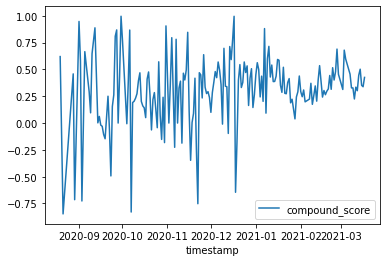

In [62]:
df_daily_reddit_GME.plot(x = 'timestamp', y = 'compound_score')
pyplot.show()